In [2]:
import torch

import numpy as np
import math

from lorenz_setup import (
    sample_delays,
    get_lorenz_stimulation,
    plot_trajectory_and_units,
    animate_activations,
)

from lorenz_settings import (
    N_UNITS,
    MIN_DELAY,
    MAX_DELAY,
    DELAY_DIST_OFFSET,
    ALPHA,
    BETA,
    GAMMA,
    DT,
    LMBDA1,
    LMBDA2,
    LMBDA3,
    U_FACTOR,
    W_FACTOR,
)

In [3]:
import matplotlib.pyplot as plt
import matplotlib
from scipy.spatial.distance import cdist

In [3]:
states, unit_locations, sample_states, unit_activation = get_lorenz_stimulation(
    n_units=N_UNITS,
    duration_placement=2500,
    duration_sample=1000,
    kernel_std=1.0,
    dt=3e-3,
    initial_state=[0, 3.5, 0],
)

In [4]:
sample_states = np.load("checkpoints/sample_states.npy")
unit_locations = np.load("checkpoints/unit_locations.npy")
unit_activation = np.load("checkpoints/unit_activation.npy")
axonal_delays = np.load("checkpoints/axonal_delays.npy")
w = np.load("checkpoints/w.npy")
X = np.load("checkpoints/X.npy")
inh_delays = np.load("checkpoints/inh_delays.npy")

In [5]:
def density_estimation(cluster_centers, bandwidth):
    n_clusters = len(cluster_centers)
    densities = np.zeros(n_clusters)

    for i, center in enumerate(cluster_centers):
        distances = cdist([center], cluster_centers, 'euclidean')[0]
        kernel_values = np.exp(-0.5 * ((distances / bandwidth) ** 2))
        densities[i] = np.sum(kernel_values) / (bandwidth * np.sqrt(2 * np.pi))

    return densities

In [6]:
densities = density_estimation(unit_locations, 10)

In [7]:
densities.max()

9.464783800077845

In [8]:
densities.min()

2.101210531150624

In [9]:
def plot_trajectory_and_units(unit_locations):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection="3d")
    #ax.plot(states[:, 0], states[:, 1], states[:, 2], lw=0.5)
    ax.scatter(
        unit_locations[:, 0], unit_locations[:, 1], unit_locations[:, 2], color="r"
    )
    #ax.set_title("Lorenz System Trajectory and Unit Positions")
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    plt.show()

In [10]:
def plot_trajectory(states):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection="3d")
    #ax.plot(states[:, 0], states[:, 1], states[:, 2], lw=0.5)
    ax.plot(states[:, 0], states[:, 1], states[:, 2], lw=0.5)

    #ax.set_title("Lorenz System Trajectory and Unit Positions")
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    plt.show()

In [11]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [12]:
def sigmoid(x):
    return 1/(1 + np.exp(-x)) 

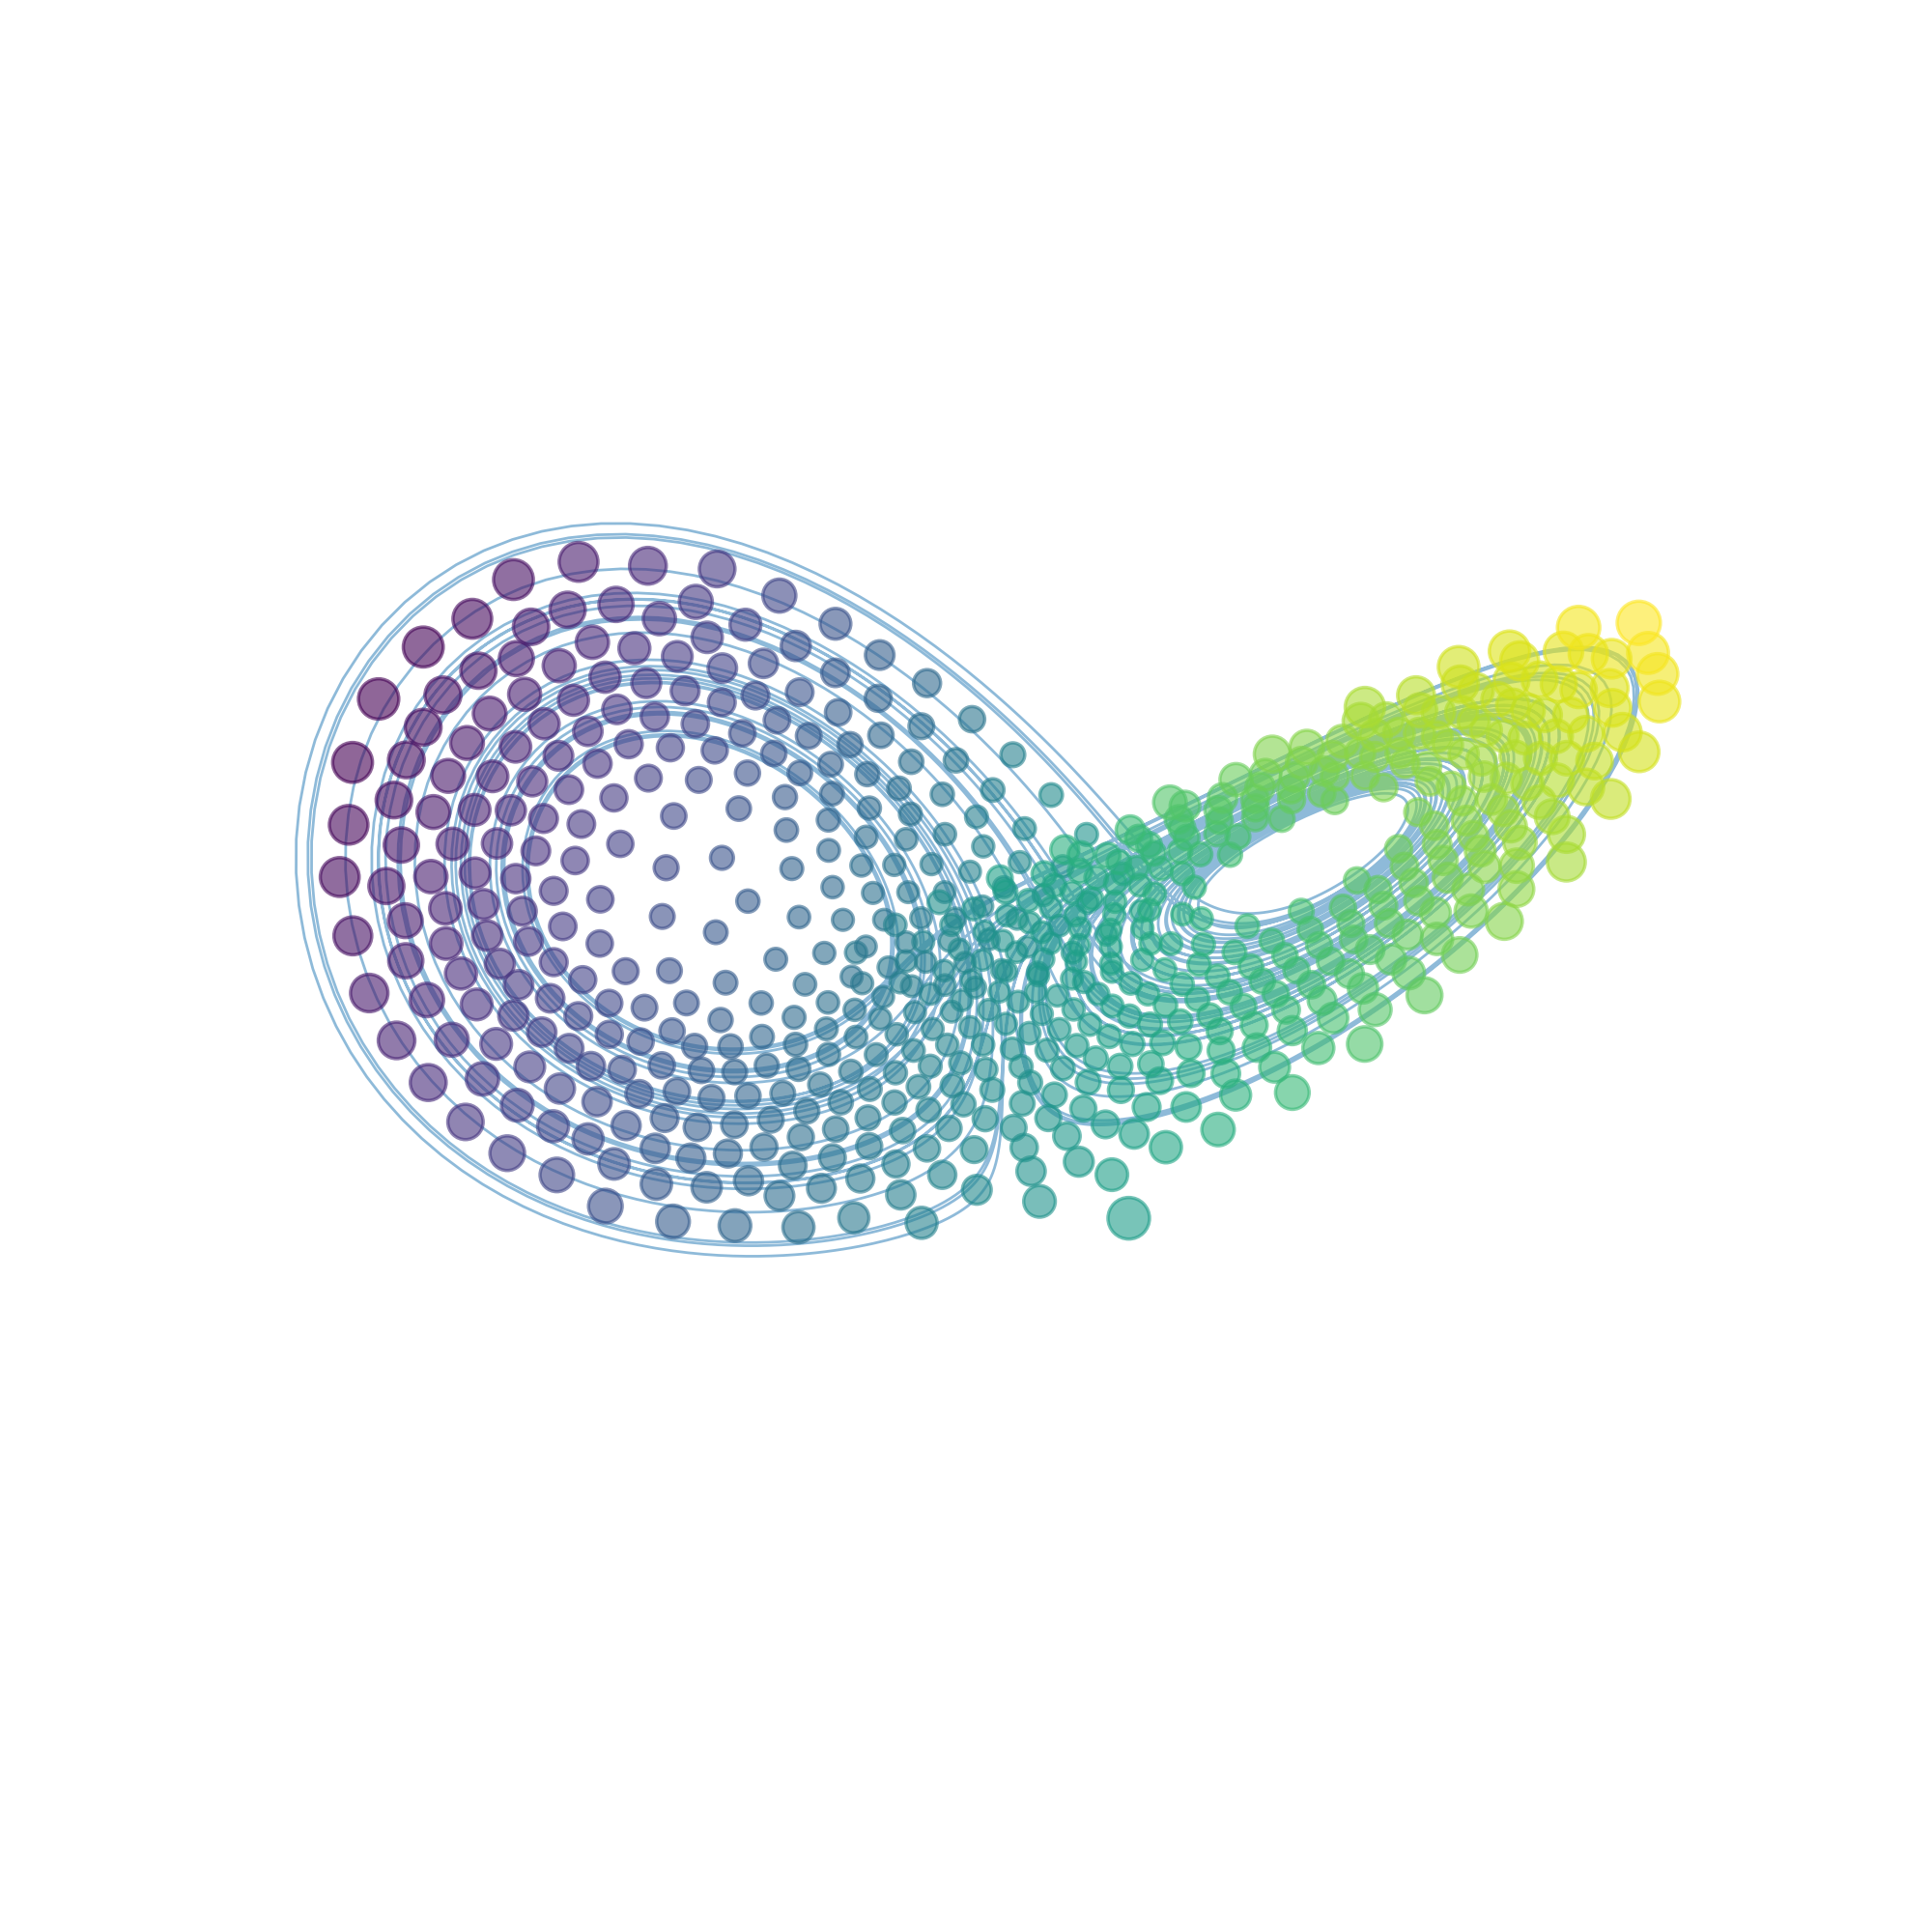

In [16]:
%matplotlib widget
marker_sizes = 350.0 / densities

# Extract Z-coordinate values for color mapping
z_values = unit_locations[:, 0]

# Create a colormap for coloring based on depth (Z-coordinate)
cmap = matplotlib.colormaps['viridis']  # You can choose any colormap you prefer

# Normalize Z-values to the range [0, 1] for colormap mapping
norm = plt.Normalize(z_values.min(), z_values.max())

# Create a 3D scatter plot
fig = plt.figure(figsize=(8, 8), dpi=250)
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with cluster centers as points and marker sizes
#for x, y, z, s, a, c in zip(unit_locations[:, 0], unit_locations[:, 1], unit_locations[:, 2],
#                            marker_sizes, sigmoid(-0.7*z_values-1), np.minimum(z_values, 20)):
#    ax.scatter(x, y, z, s=s, alpha=a, c=c, cmap=cmap, marker='o', norm=norm)
ax.scatter(unit_locations[:, 0], unit_locations[:, 1], unit_locations[:, 2], s=marker_sizes,
           alpha=0.6,#sigmoid(-2*((unit_locations[:, 0])) + 2),
           c=z_values, cmap=cmap, marker='o', norm=norm)

ax.set_axis_off()

cutoff=10000
# Scatter plot with cluster centers as points and marker sizes
ax.plot(sample_states[:cutoff, 0], sample_states[:cutoff, 1], sample_states[:cutoff, 2], lw=0.8, alpha=0.5)
plt.tight_layout()

# Set labels for the axes
#ax.set_xlabel('X-axis')
#ax.set_ylabel('Y-axis')
#ax.set_zlabel('Z-axis')

# Set title for the plot
#ax.set_title('Cluster Centers with Size Proportional to Inverse Densities')

# Show the plot
plt.show()

In [17]:
plt.savefig("test.pdf", bbox_inches='tight')

In [18]:
plt.close(fig)

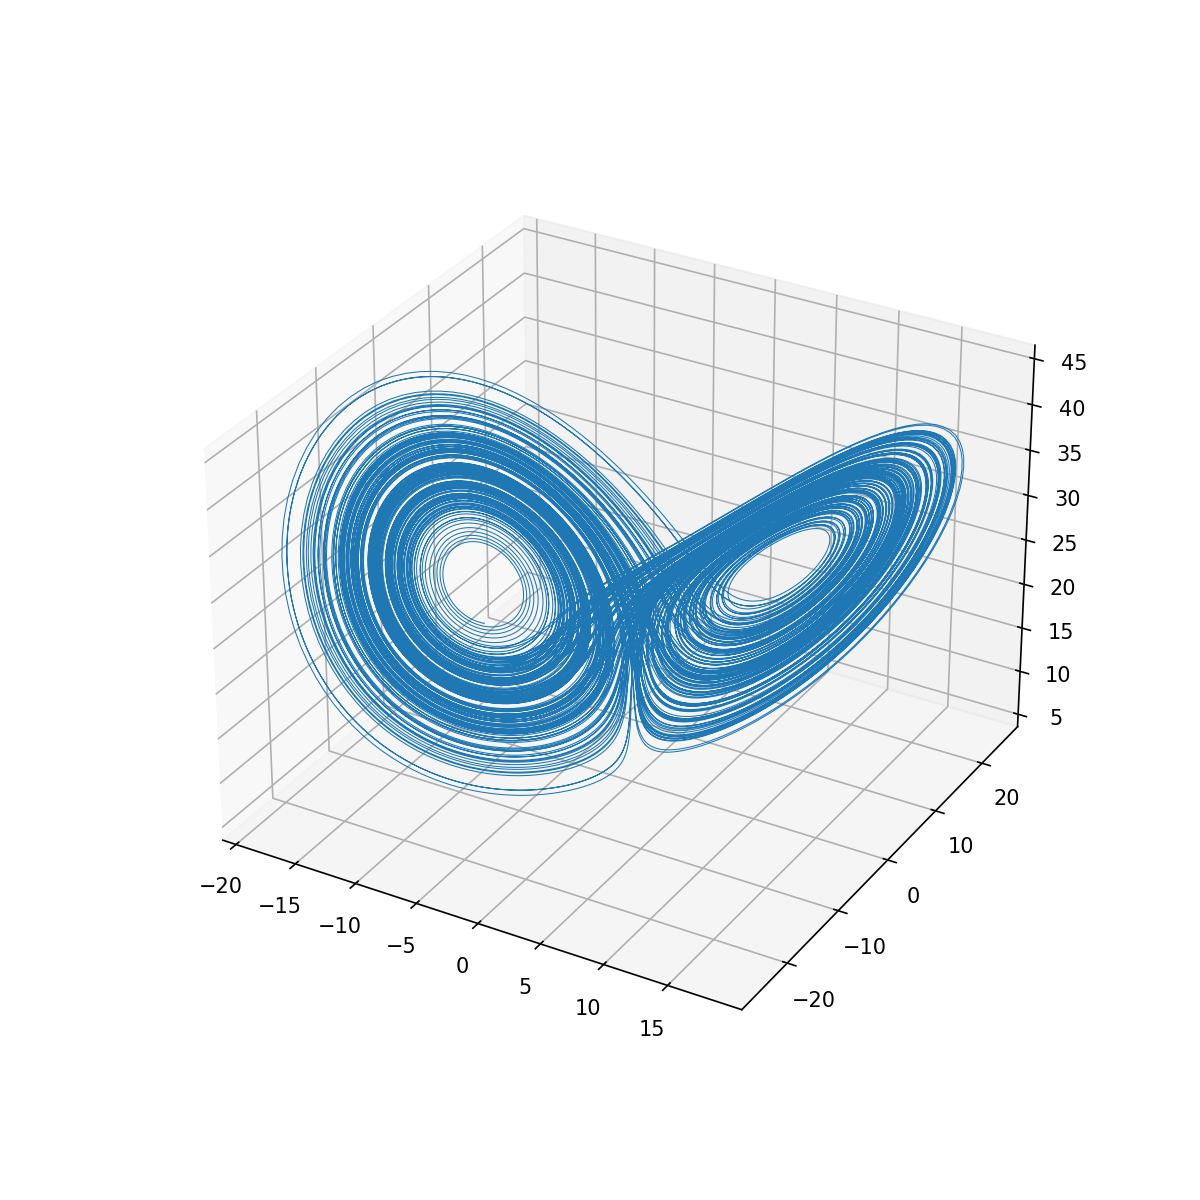

In [13]:
%matplotlib widget

# Create a 3D scatter plot
fig = plt.figure(figsize=(8, 8), dpi=150)
ax = fig.add_subplot(111, projection='3d')

cutoff=50000
# Scatter plot with cluster centers as points and marker sizes
ax.plot(sample_states[:cutoff, 0], sample_states[:cutoff, 1], sample_states[:cutoff, 2], lw=0.5)

# Set labels for the axes
#ax.set_xlabel('X-axis')
#ax.set_ylabel('Y-axis')
#ax.set_zlabel('Z-axis')

# Set title for the plot
#ax.set_title('Cluster Centers with Size Proportional to Inverse Densities')

# Show the plot
plt.show()

In [14]:
plt.savefig('lorenz_lines.png')

In [14]:
plt.close(fig)